In [9]:
import csv

STOCKS_FILE_NAME = 'N5.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

['AAPL', 'GOOG', 'BAC', 'WTW', 'PCRX', 'LOW', 'CRM']

In [1]:
import requests
import csv

def get_minute_data(symbol):        
    url = "https://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q={}".format(symbol)
    page = requests.get(url)
    reader = csv.reader(page.content.decode('utf-8').splitlines())
    return symbol, list(reader) 
_, data = get_minute_data("AAPL")
data

[['EXCHANGE%3DNASDAQ'],
 ['MARKET_OPEN_MINUTE=570'],
 ['MARKET_CLOSE_MINUTE=960'],
 ['INTERVAL=60'],
 ['COLUMNS=DATE', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME'],
 ['DATA='],
 ['TIMEZONE_OFFSET=-300'],
 ['a1488983400', '138.95', '138.96', '138.9', '138.95', '238854'],
 ['1', '138.94', '139.25', '138.9', '138.95', '244219'],
 ['2', '139.01', '139.28', '138.91', '138.94', '132159'],
 ['3', '139.1', '139.14', '138.96', '139', '120175'],
 ['4', '139.29', '139.34', '139.04', '139.08', '113937'],
 ['5', '139.34', '139.4', '139.2444', '139.29', '120678'],
 ['6', '139.22', '139.49', '139.21', '139.34', '180714'],
 ['7', '139.16', '139.285', '139.1', '139.21', '92119'],
 ['8', '139.34', '139.35', '139.13', '139.16', '90167'],
 ['9', '139.35', '139.35', '139.25', '139.34', '72564'],
 ['10', '139.21', '139.44', '139.2', '139.36', '95795'],
 ['11', '139.18', '139.24', '139.14', '139.21', '99467'],
 ['12', '139.23', '139.32', '139.157', '139.19', '65287'],
 ['13', '139.2537', '139.27', '139.21', '13

In [4]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np

DATA_TIMEZONE = pytz.timezone("US/Eastern")
LOCAL_TZ = pytz.timezone('America/Los_Angeles')

def minute_data_to_df(data):
    base_timestamp = 0
    t, c, h, l, o, v = [[] for i in range(6)]
    for i, row in enumerate(data):
        if len(row) == 6:
            timestamp, close, high, low, open, volume = row
            if timestamp.startswith("a"):
                base_timestamp = int(timestamp[1:])                
            elif timestamp.isnumeric(): 
                delta = timedelta(seconds=60 * (int(timestamp) - 1))
                dt = datetime.fromtimestamp(base_timestamp, tz=DATA_TIMEZONE) + delta
                t.append(dt.astimezone(LOCAL_TZ))
                c.append(float(close))
                h.append(float(high))
                l.append(float(low))
                o.append(float(open))
                v.append(int(volume))
                
    df = df = pd.DataFrame(dict(time=t, close=c, high=h, low=l, open=o, volume=v))
    return df                
    
dd = minute_data_to_df(data)
dd

,close,high,low,open,time,volume
0,138.9400,139.2500,138.9000,138.9500,2017-03-08 06:30:00-08:00,244219
1,139.0100,139.2800,138.9100,138.9400,2017-03-08 06:31:00-08:00,132159
2,139.1000,139.1400,138.9600,139.0000,2017-03-08 06:32:00-08:00,120175
3,139.2900,139.3400,139.0400,139.0800,2017-03-08 06:33:00-08:00,113937
4,139.3400,139.4000,139.2444,139.2900,2017-03-08 06:34:00-08:00,120678
5,139.2200,139.4900,139.2100,139.3400,2017-03-08 06:35:00-08:00,180714
6,139.1600,139.2850,139.1000,139.2100,2017-03-08 06:36:00-08:00,92119
7,139.3400,139.3500,139.1300,139.1600,2017-03-08 06:37:00-08:00,90167
8,139.3500,139.3500,139.2500,139.3400,2017-03-08 06:38:00-08:00,72564
9,139.2100,139.4400,139.2000,139.3600,2017-03-08 06:39:00-08:00,95795


In [6]:
last_date = md_df.time.max().date()
print(last_date)
avg9days = dd[dd.time.dt.date != last_date].volume.mean()
print(avg9days)
dd = dd[dd.time.dt.date == last_date].copy()
dd_len = len(dd)
dd['current_score'] = dd.volume / avg9days
dd['rolling_score'] = dd.current_score.rolling(window=dd_len, min_periods=1).mean()
dd

2017-03-21
44855.8367056


,close,high,low,open,time,volume,current_score,rolling_score
3509,142.3800,142.5000,142.1500,142.1700,2017-03-21 06:30:00-07:00,463172,10.325791,10.325791
3510,142.3100,142.4600,142.2700,142.4000,2017-03-21 06:31:00-07:00,364313,8.121864,9.223827
3511,142.3600,142.3900,142.1600,142.2908,2017-03-21 06:32:00-07:00,198924,4.434741,7.627465
3512,142.3200,142.3600,142.2300,142.3600,2017-03-21 06:33:00-07:00,141505,3.154662,6.509264
3513,142.4800,142.5100,142.3000,142.3000,2017-03-21 06:34:00-07:00,308437,6.876184,6.582648
3514,142.5900,142.6300,142.4500,142.4800,2017-03-21 06:35:00-07:00,238793,5.323566,6.372801
3515,142.7400,142.7400,142.5700,142.5800,2017-03-21 06:36:00-07:00,220469,4.915057,6.164552
3516,142.6600,142.7400,142.6000,142.7350,2017-03-21 06:37:00-07:00,259470,5.784531,6.117050
3517,142.5799,142.7400,142.5499,142.6500,2017-03-21 06:38:00-07:00,258968,5.773340,6.078860
3518,142.4900,142.6200,142.4300,142.5750,2017-03-21 06:39:00-07:00,260264,5.802233,6.051197


In [15]:
import threading
import queue


def get_data_parallel(symbols):    
    max_threads = 300
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_minute_data(*args)
            if response:
                result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock,))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    while True:
        try:
            symbol, result = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            data = minute_data_to_df(result)
            if len(data):
                last_date = data.time.max().date()

                prev_days_data = data[data.time.dt.date != last_date]
                prev_data_len = len(prev_days_data)
                prev_close = prev_days_data.iloc[prev_data_len - 1].close
                avg9days = prev_days_data.volume.mean()

                data = data[data.time.dt.date == last_date].copy()
                data['symbol'] = symbol
                data['avg9days'] = avg9days
                data['current_score'] = data.volume / avg9days
                dd_len = len(data)
                data['rolling_score'] = data.current_score.rolling(window=dd_len, min_periods=1).mean()

                if df is None:
                    df = data
                else:
                    df = df.append(data, ignore_index=True)             
            
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
all_dd = get_data_parallel(get_stocks()[:10])
all_dd

,close,high,low,open,time,volume,symbol,avg9days,current_score,rolling_score
0,14.8100,14.8500,14.8100,14.8400,2017-03-21 06:30:00-07:00,1643,WTW,2994.000947,0.548764,0.548764
1,14.8200,14.8400,14.8000,14.8000,2017-03-21 06:31:00-07:00,1100,WTW,2994.000947,0.367401,0.458083
2,14.8500,14.8500,14.8000,14.8200,2017-03-21 06:32:00-07:00,6334,WTW,2994.000947,2.115564,1.010576
3,14.8800,14.8800,14.8700,14.8700,2017-03-21 06:33:00-07:00,400,WTW,2994.000947,0.133600,0.791332
4,14.8800,14.8800,14.8800,14.8800,2017-03-21 06:34:00-07:00,300,WTW,2994.000947,0.100200,0.653106
5,14.8200,14.8700,14.8200,14.8700,2017-03-21 06:35:00-07:00,5250,WTW,2994.000947,1.753506,0.836506
6,14.8200,14.8200,14.8200,14.8200,2017-03-21 06:37:00-07:00,500,WTW,2994.000947,0.167001,0.740862
7,14.8200,14.8400,14.8200,14.8200,2017-03-21 06:38:00-07:00,10419,WTW,2994.000947,3.479959,1.083249
8,14.8502,14.8502,14.8502,14.8502,2017-03-21 06:39:00-07:00,1000,WTW,2994.000947,0.334001,1.000000
9,14.8200,14.8600,14.8200,14.8600,2017-03-21 06:40:00-07:00,1700,WTW,2994.000947,0.567802,0.956780


/usr/local/lib/python3.4/dist-packages/matplotlib-2.0.0b4_3022.gdfd38f7-py3.4-linux-x86_64.egg/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


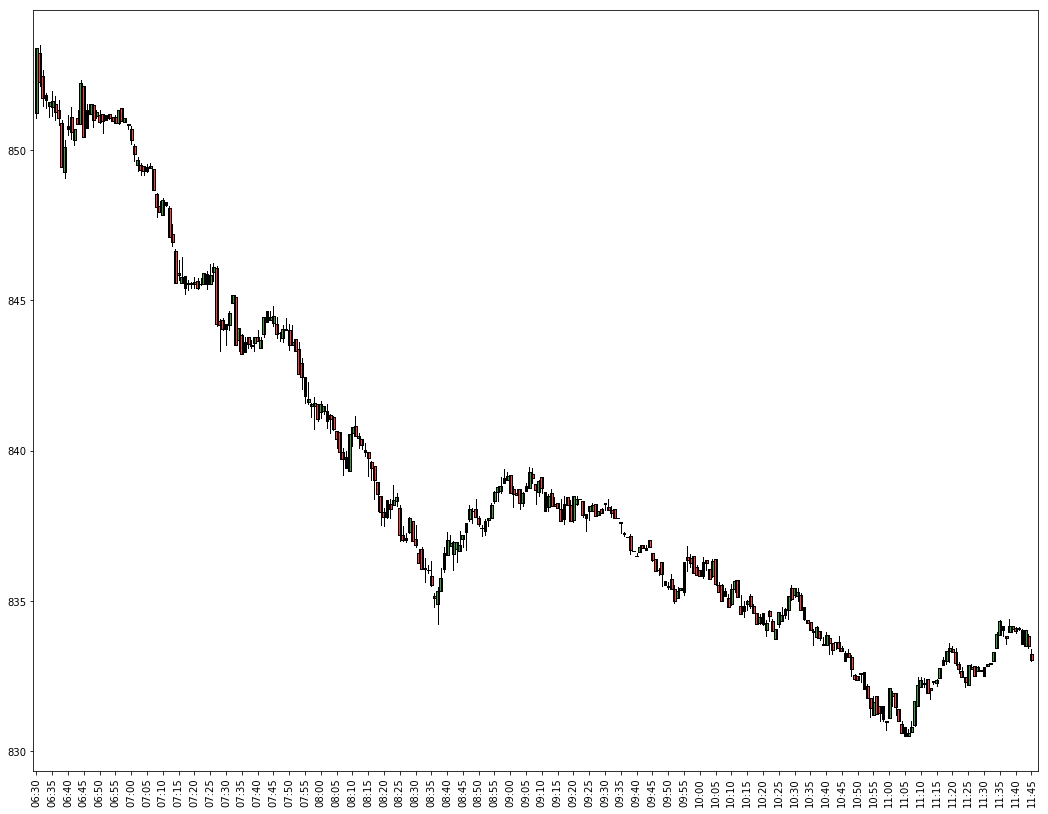

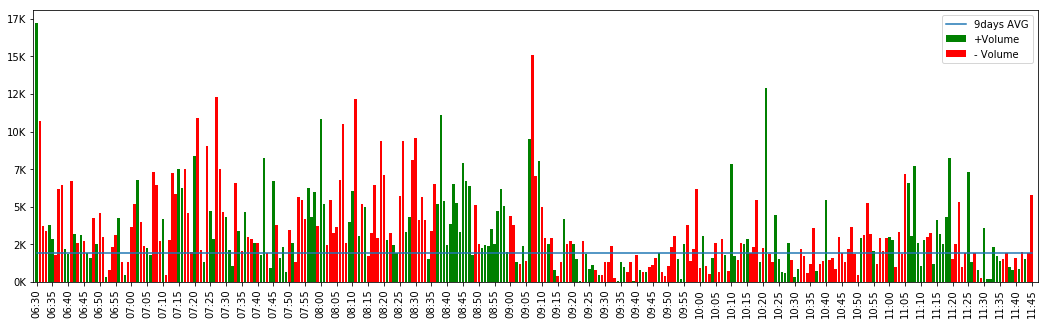

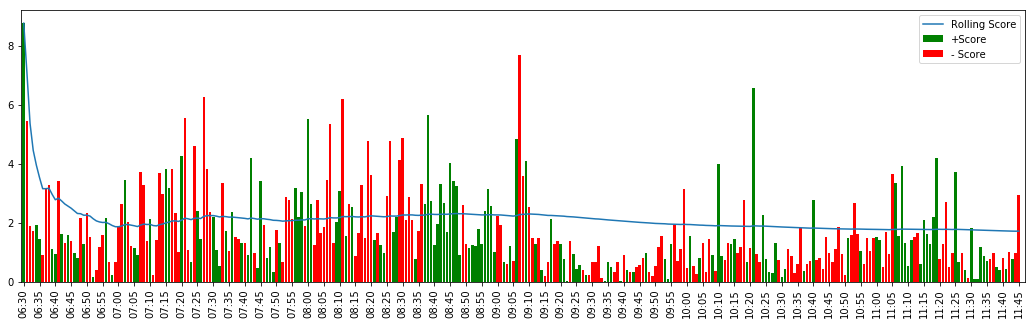

In [16]:
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker


def display_charts(df):
    if not len(df):
        print("No data")
        return
    
    df = df.reset_index()
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.loc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    plt.show()

display_charts(all_dd[all_dd.symbol == "GOOG"])

1. BAC 11:48AM: Rolling Score 3.140304507123439, Current Score 0.6358489556291435


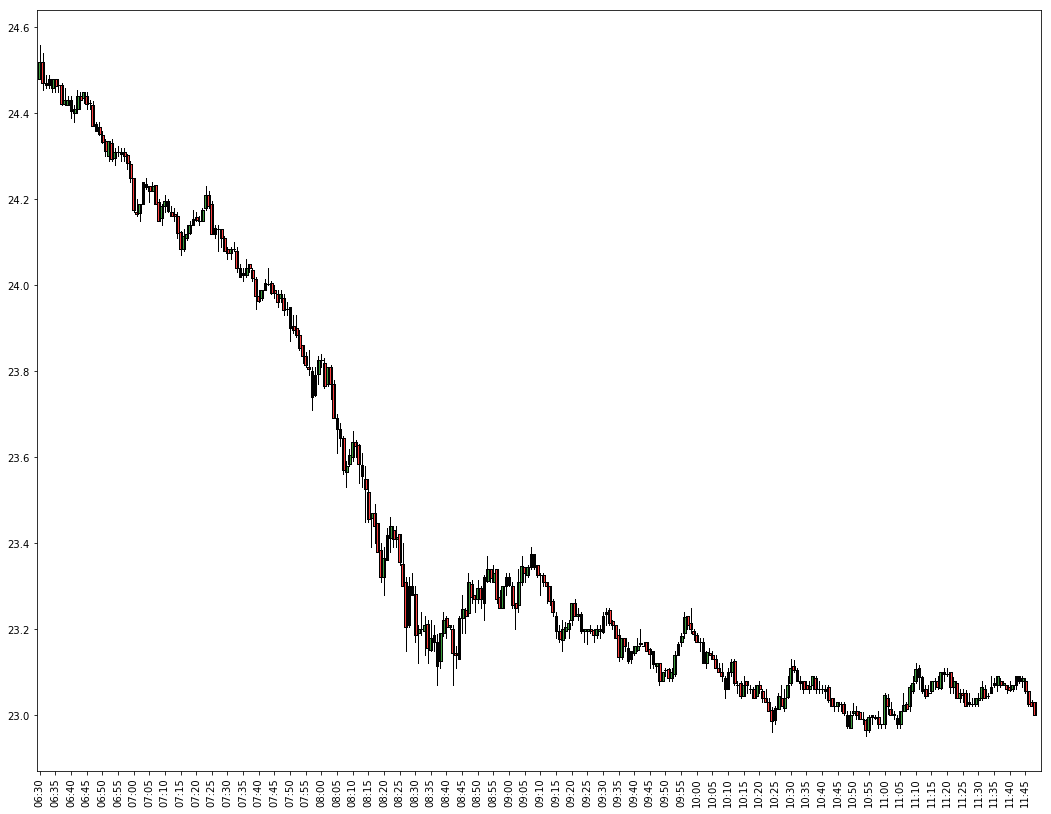

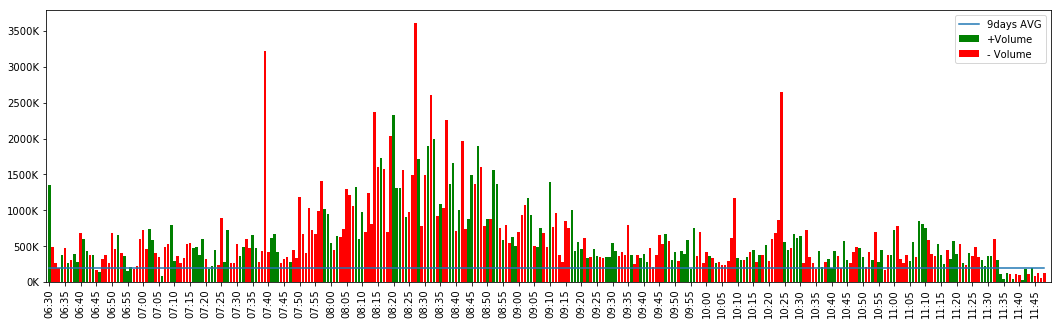

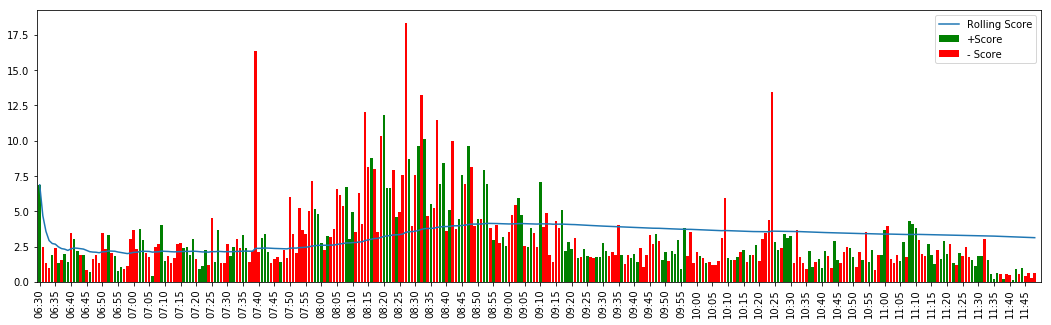

2. AAPL 11:48AM: Rolling Score 1.7566382752138565, Current Score 0.40378245798574325


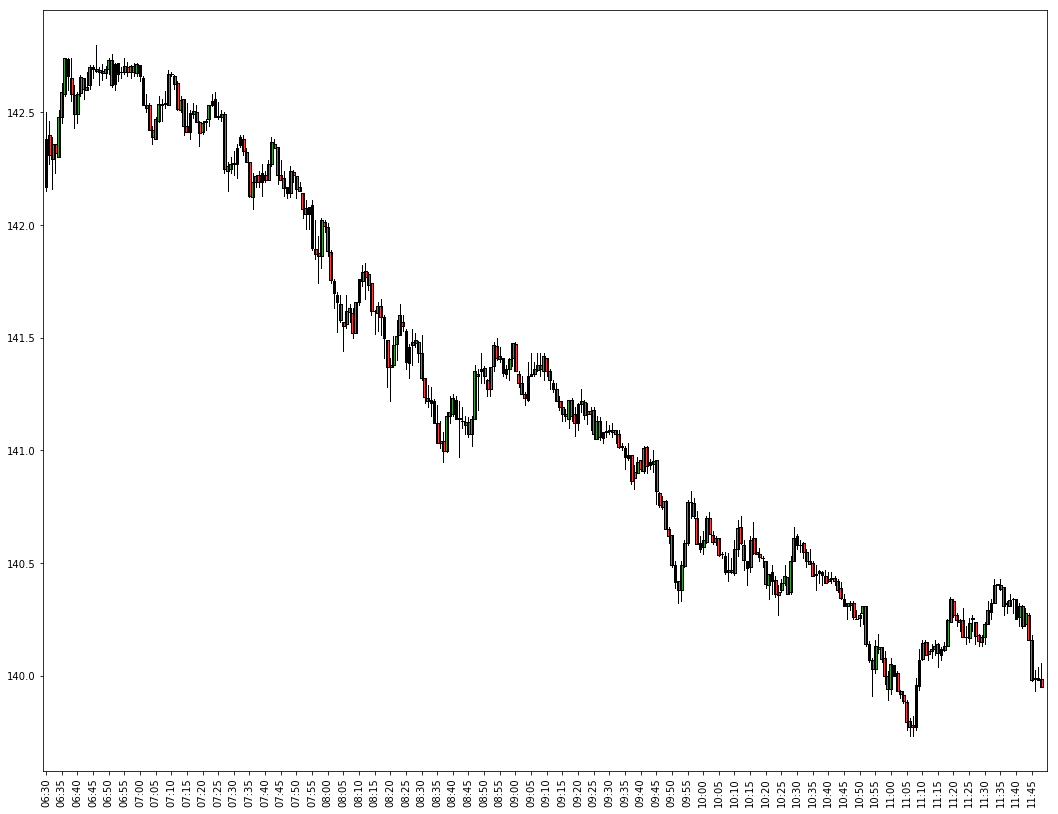

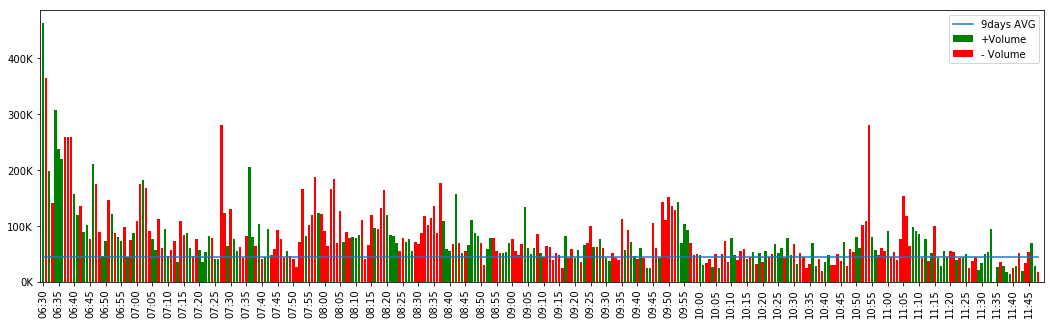

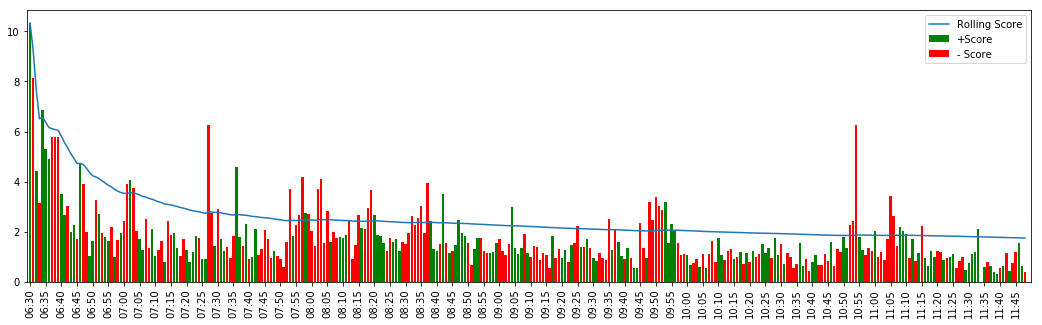

3. GOOG 11:48AM: Rolling Score 1.720320426594578, Current Score 0.5604617290054815


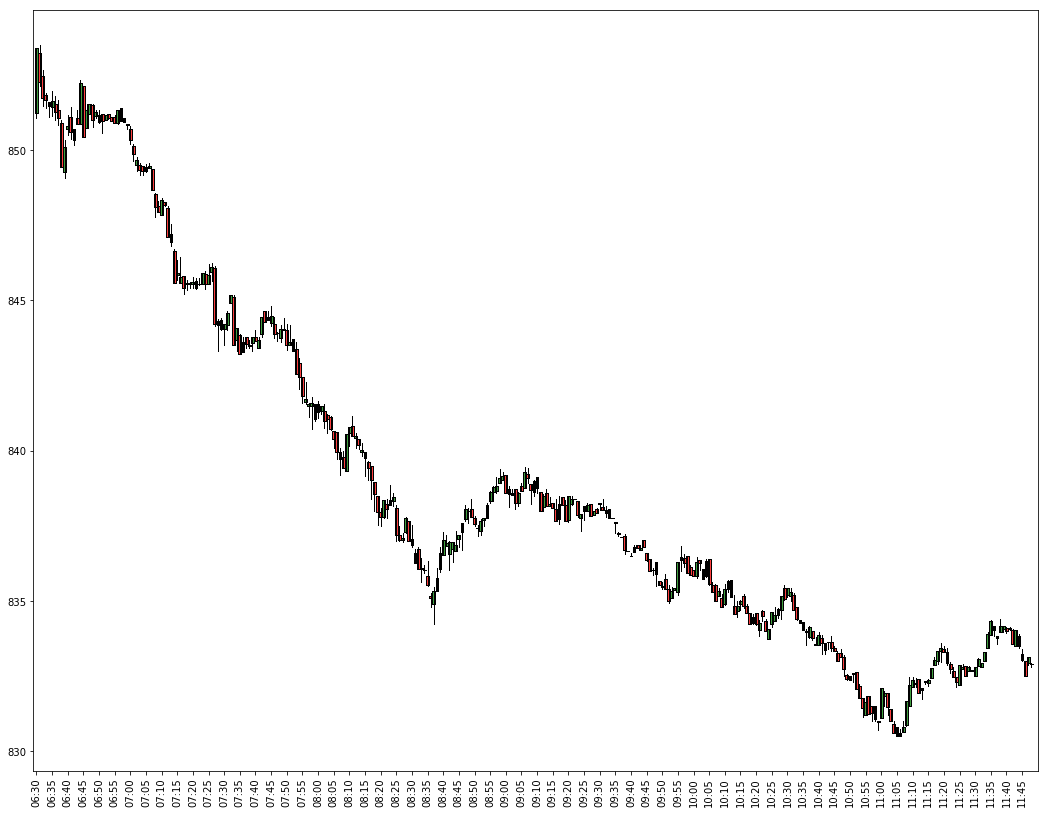

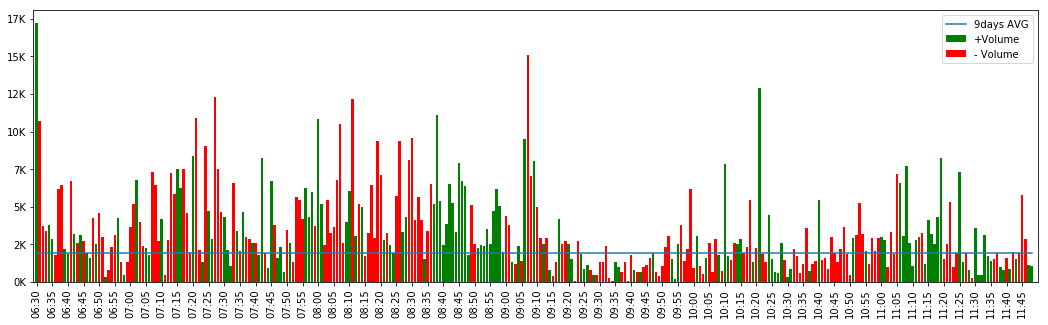

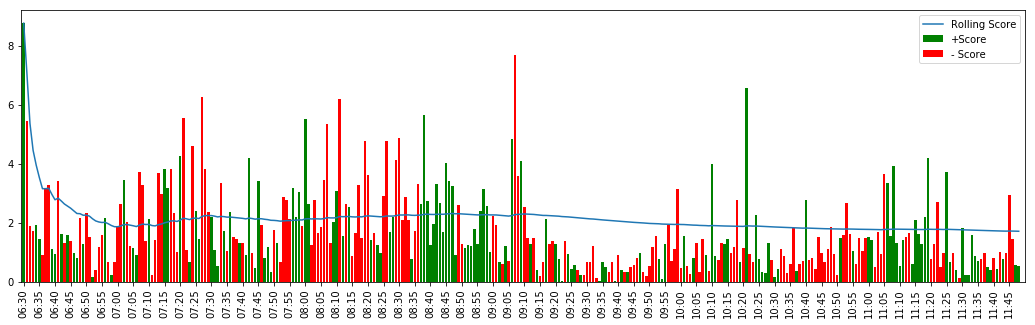

4. LOW 11:48AM: Rolling Score 0.9839702666540034, Current Score 0.5535171540600649


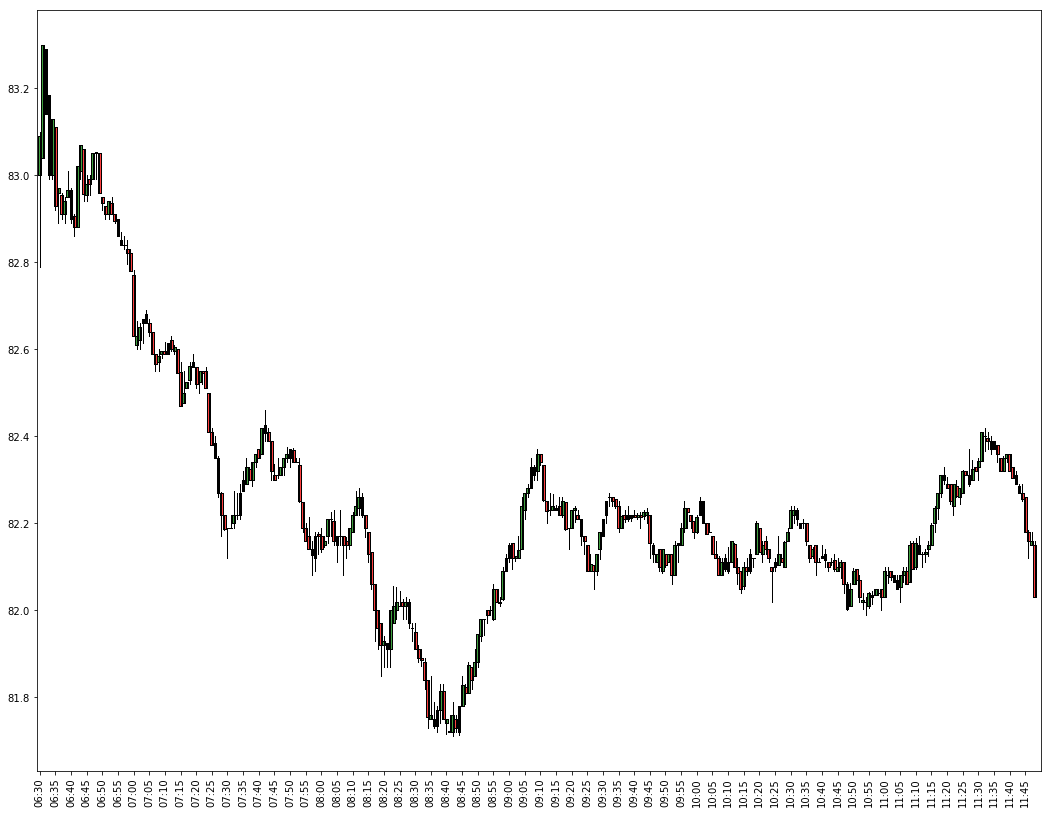

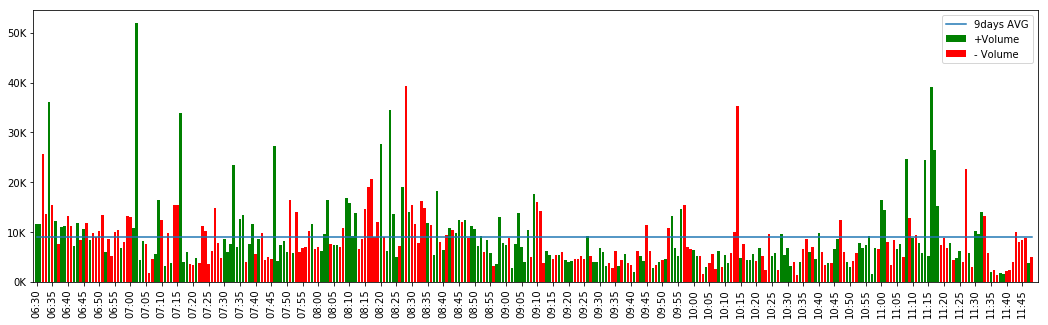

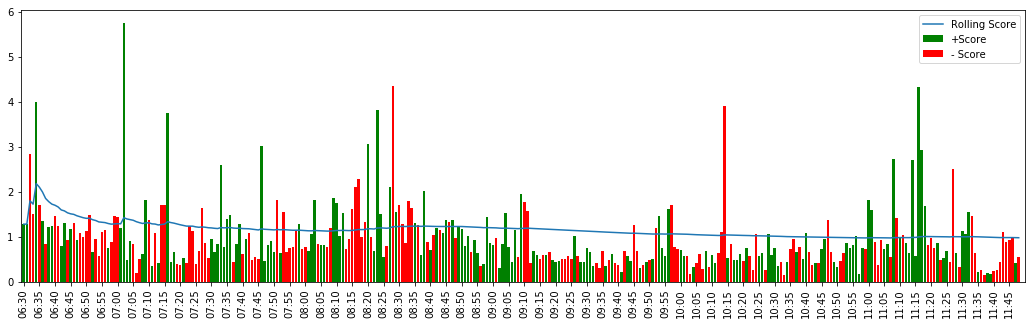

5. CRM 11:48AM: Rolling Score 0.8762137866124828, Current Score 0.3655379766417546


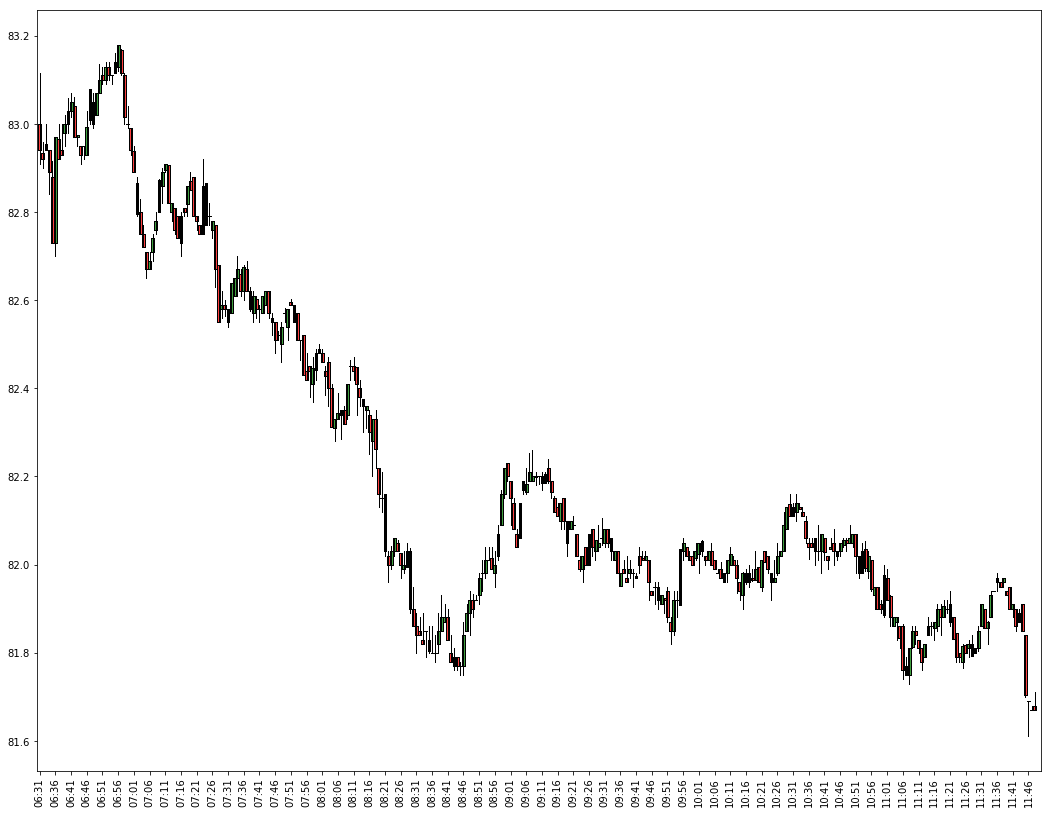

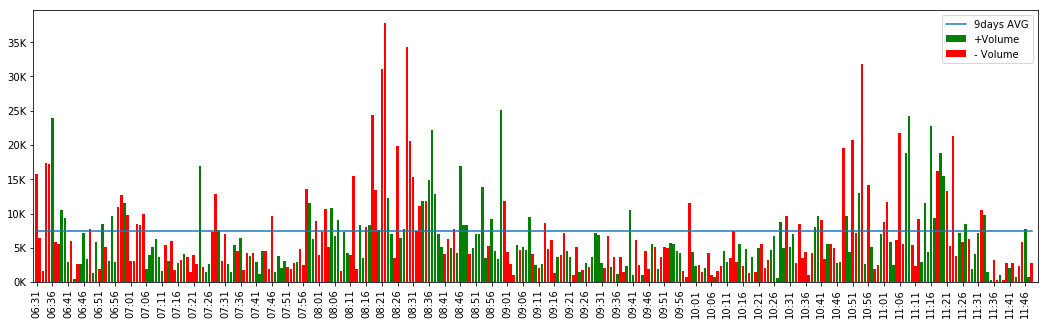

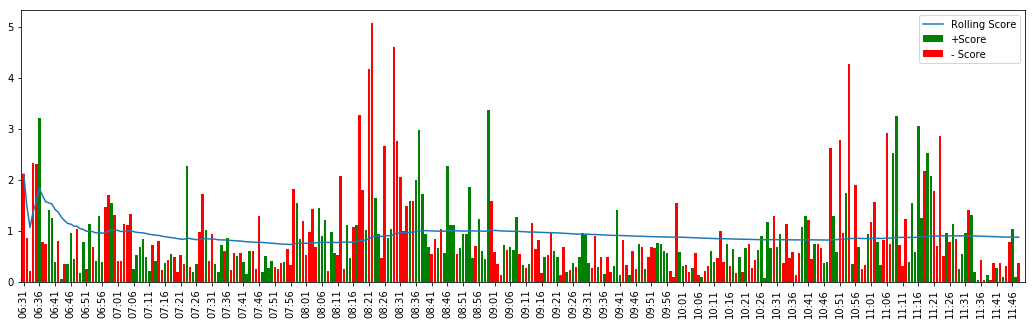

6. PCRX 11:48AM: Rolling Score 0.722256618616182, Current Score 0.1549241996173704


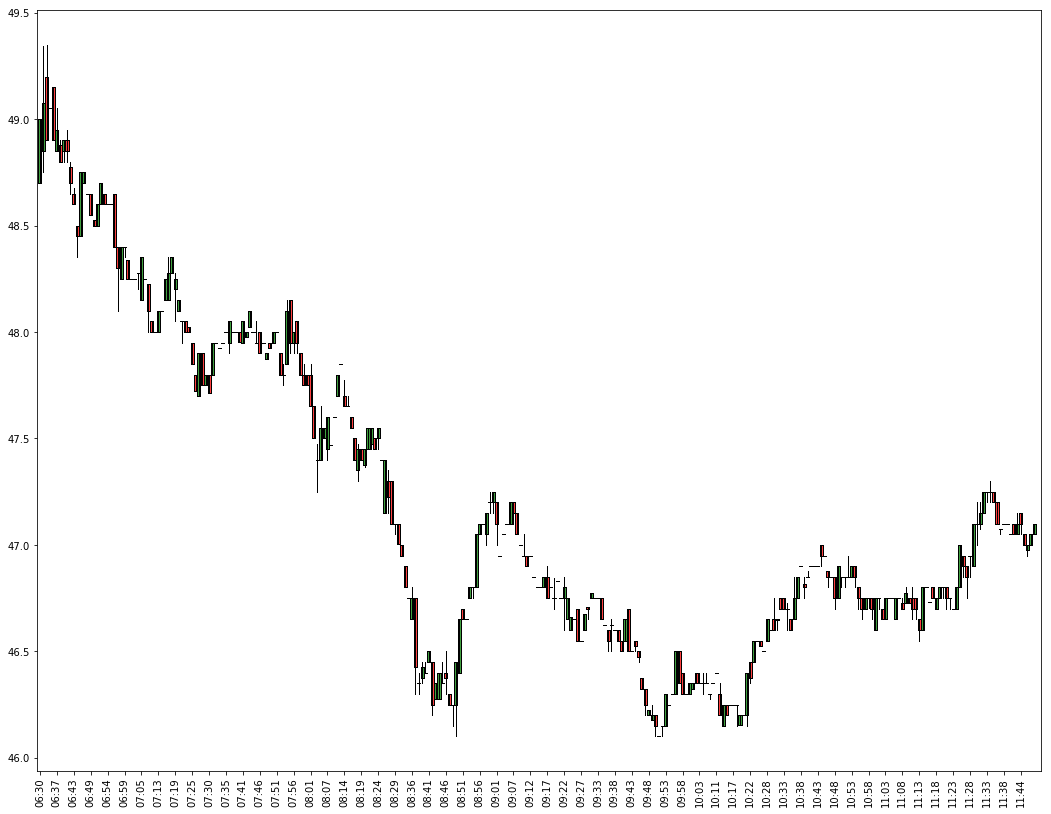

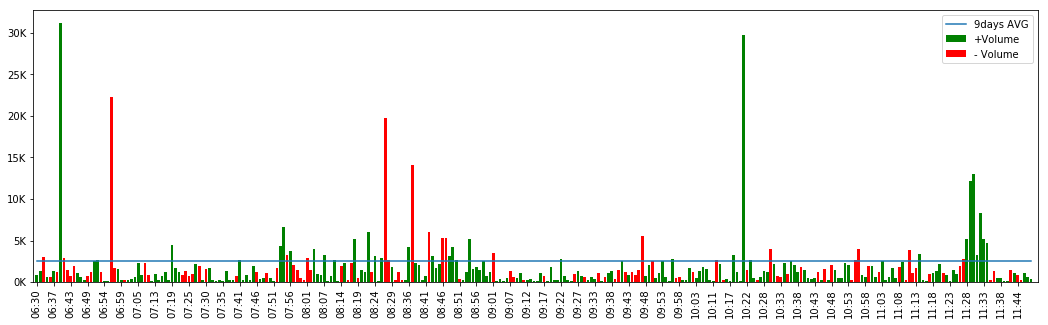

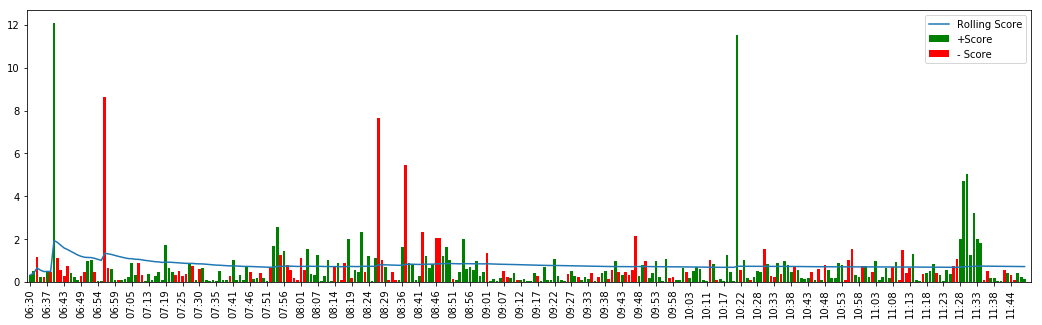

7. WTW 11:48AM: Rolling Score 0.7000884406725378, Current Score 0.14028051673903008


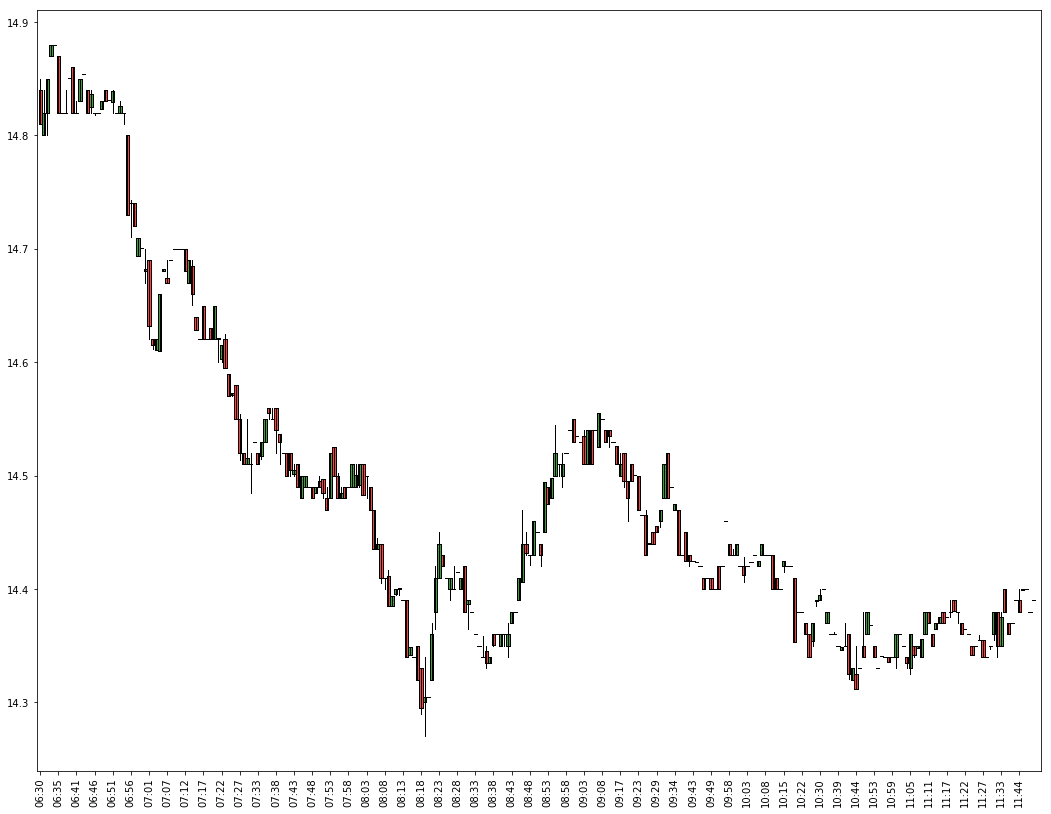

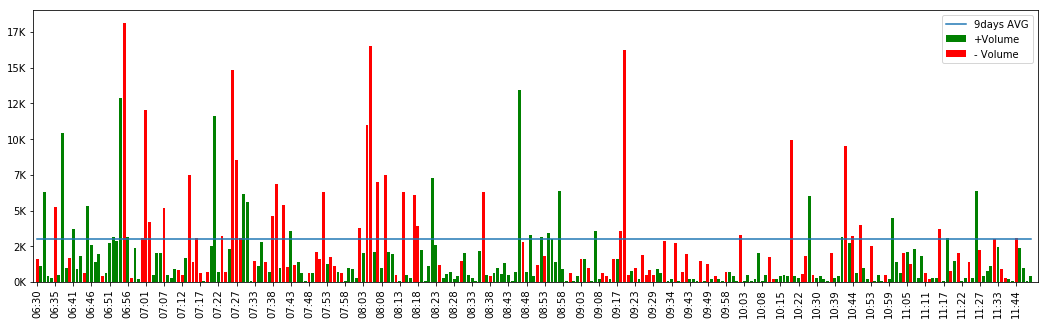

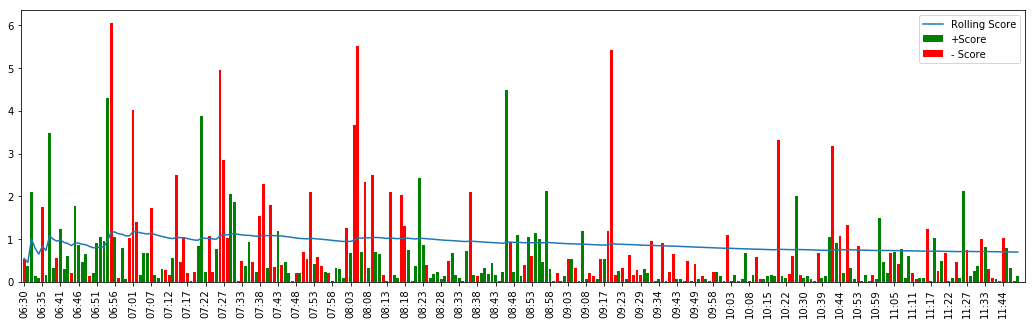

1. BAC 11:48AM: Rolling Score 3.140304507123439, Current Score 0.6358489556291435


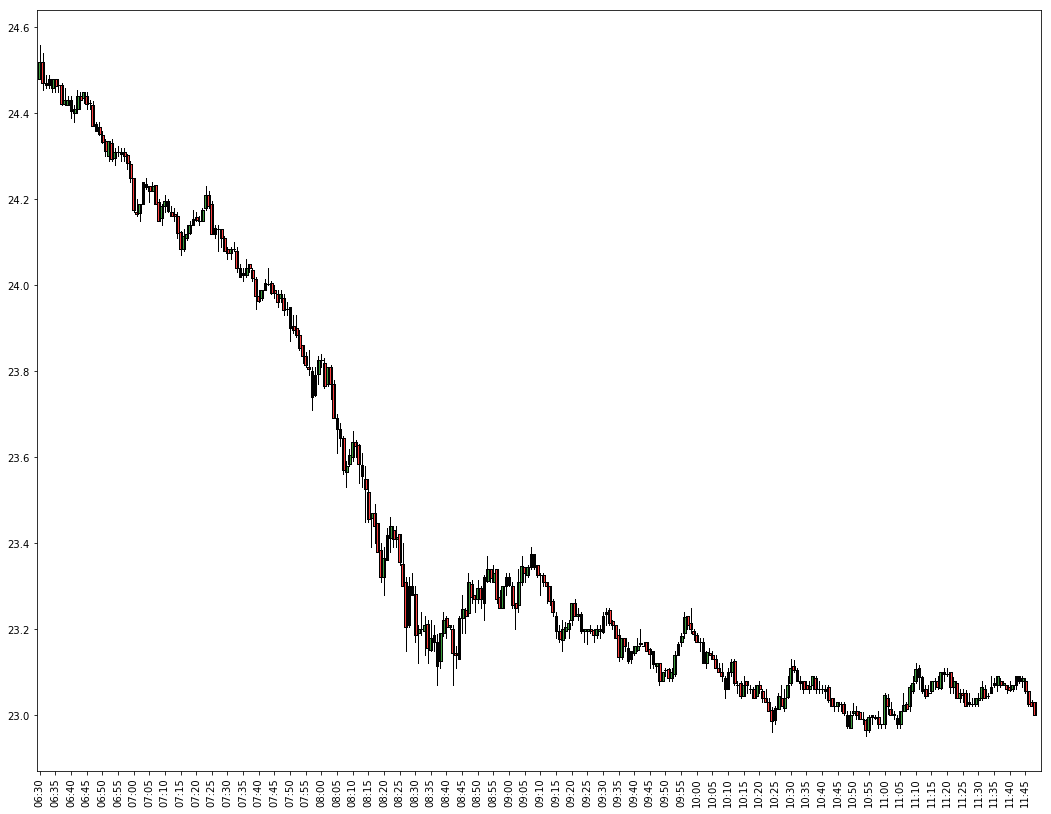

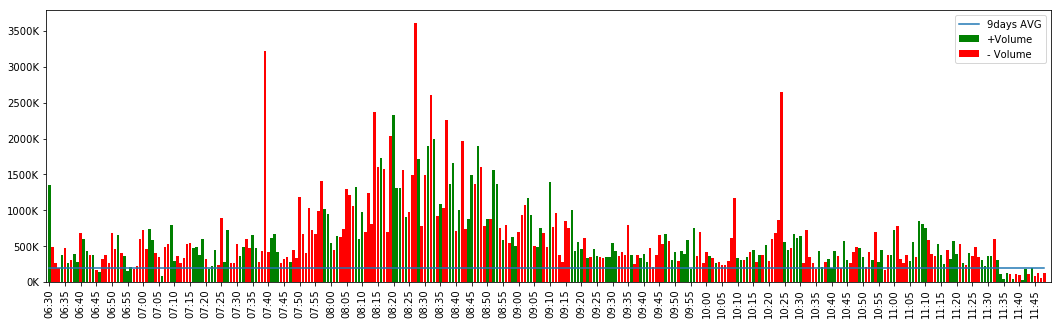

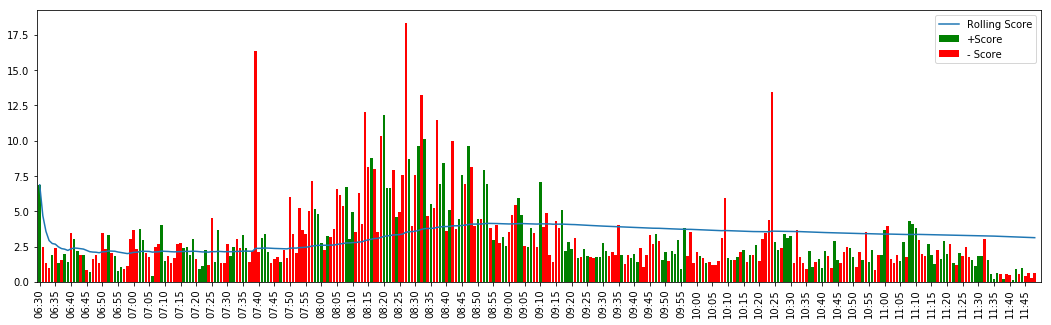

2. GOOG 11:48AM: Rolling Score 1.720320426594578, Current Score 0.5604617290054815


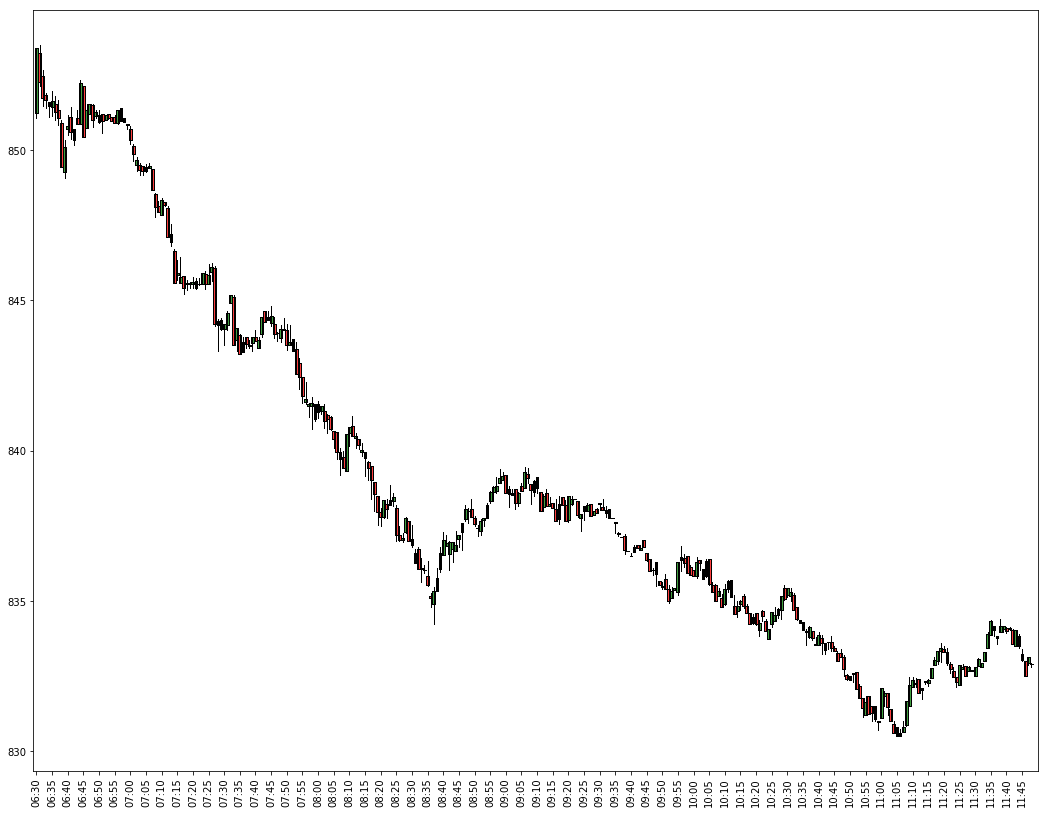

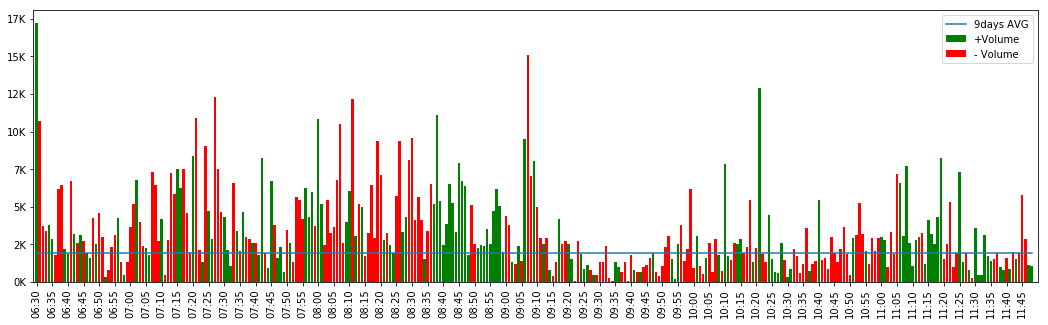

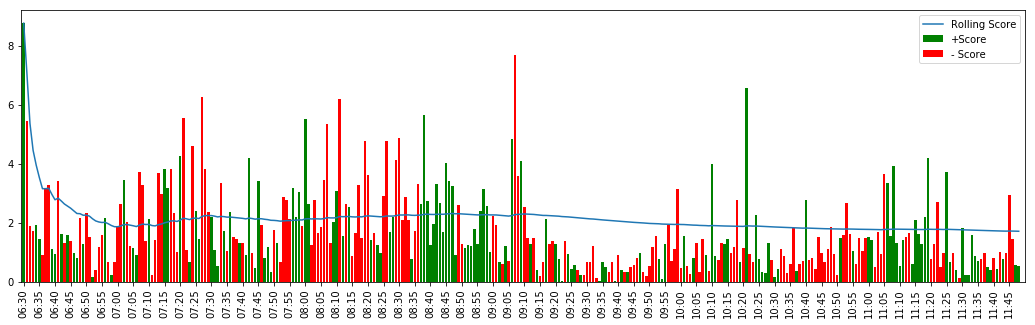

3. LOW 11:48AM: Rolling Score 0.9839702666540034, Current Score 0.5535171540600649


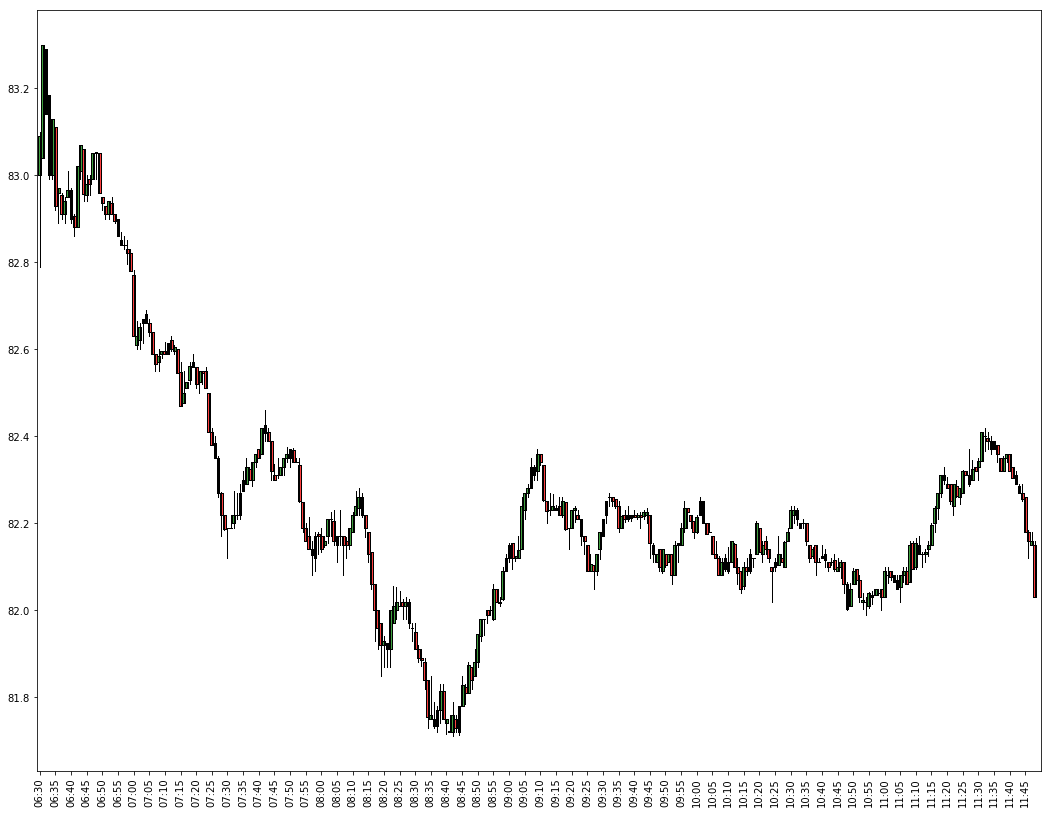

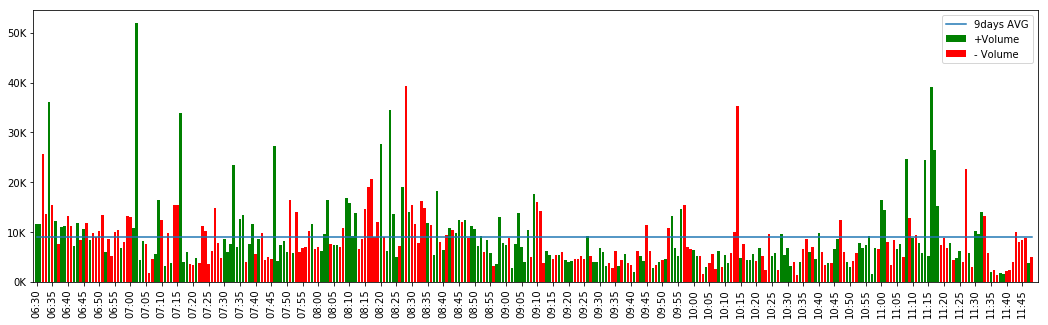

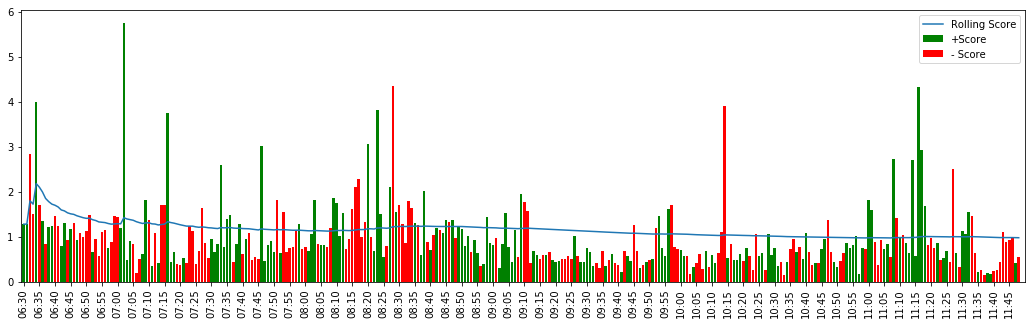

4. AAPL 11:48AM: Rolling Score 1.7566382752138565, Current Score 0.40378245798574325


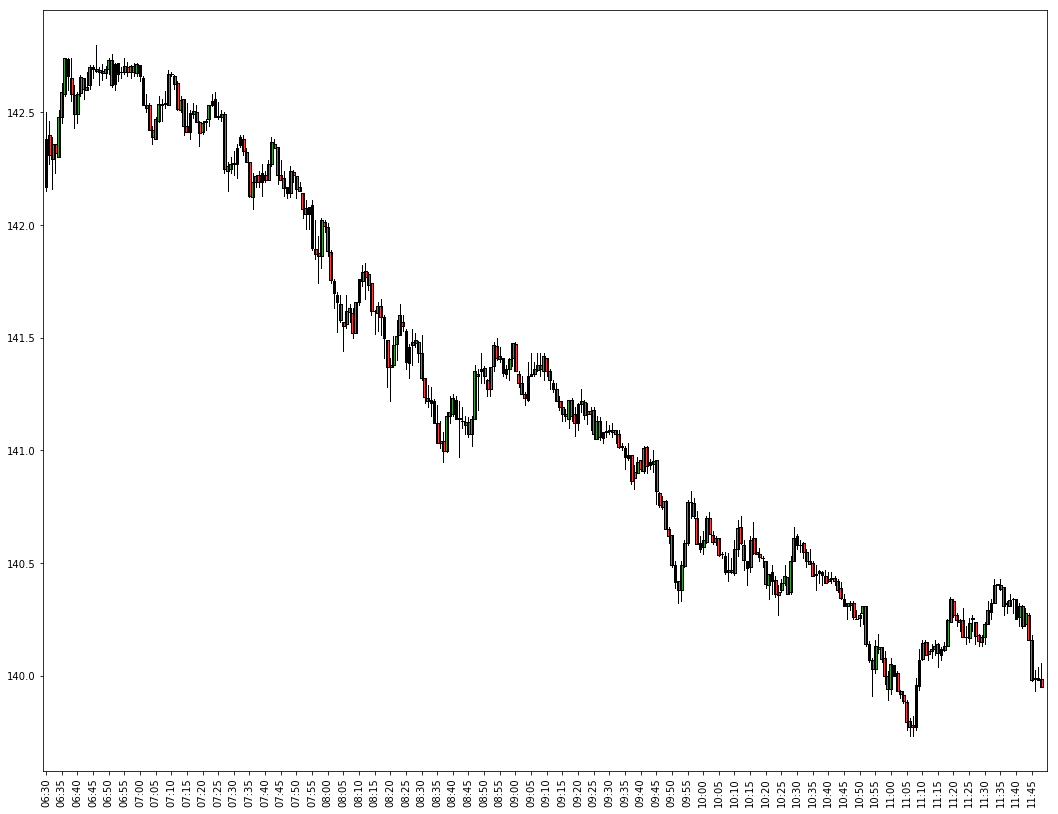

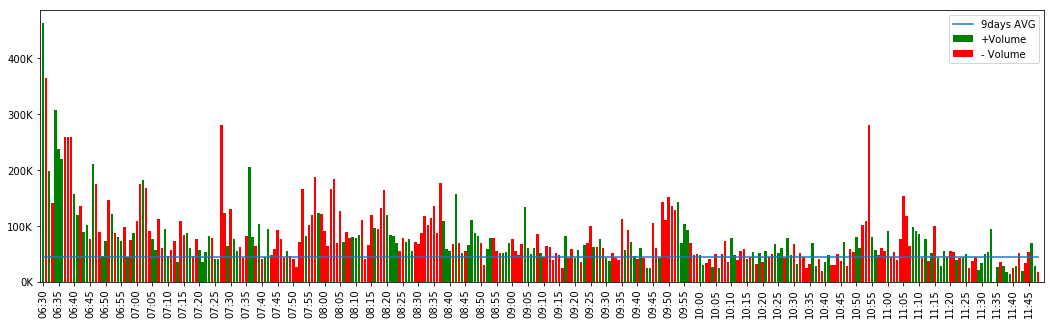

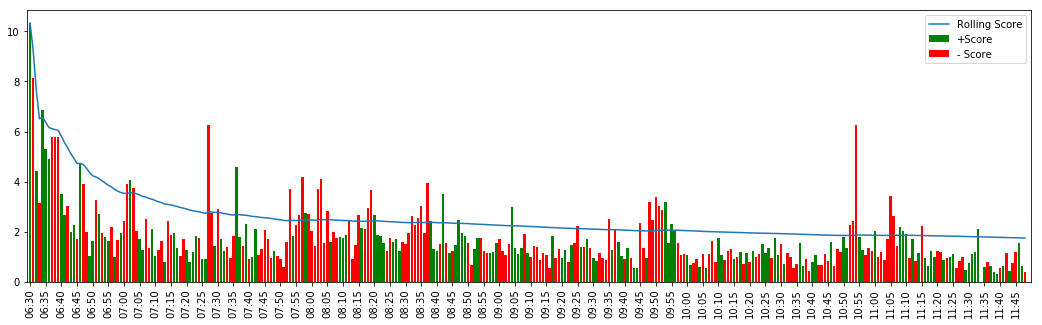

5. CRM 11:48AM: Rolling Score 0.8762137866124828, Current Score 0.3655379766417546


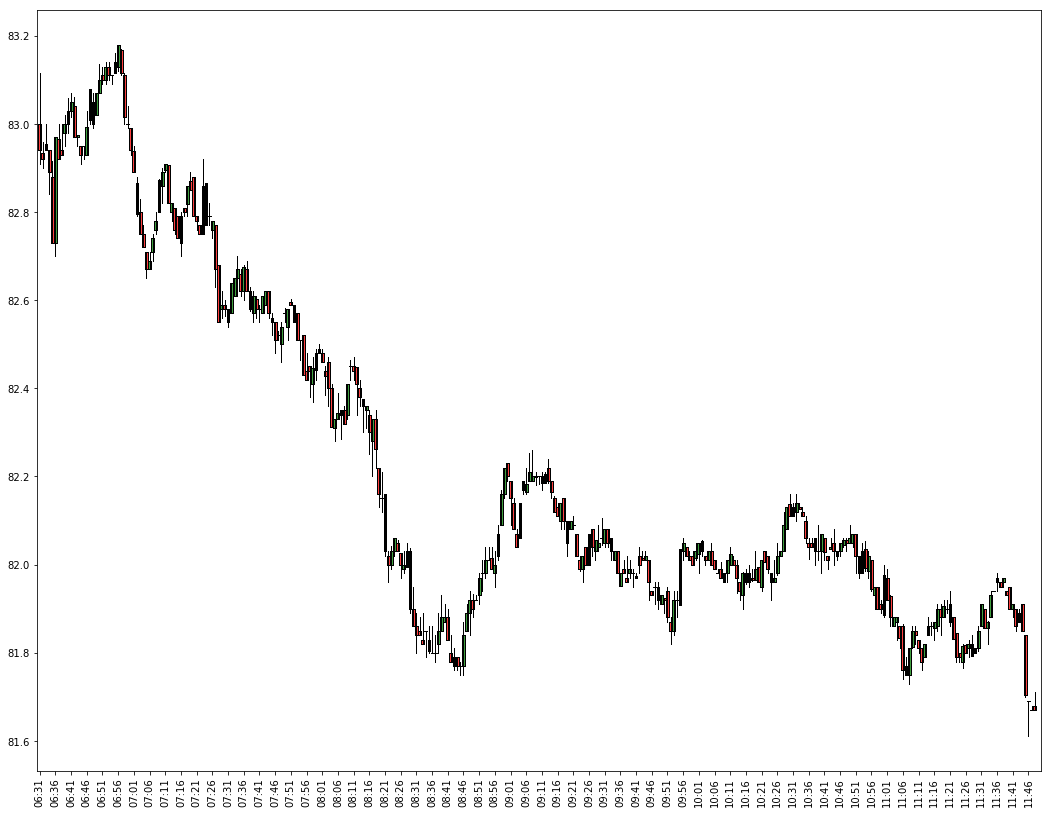

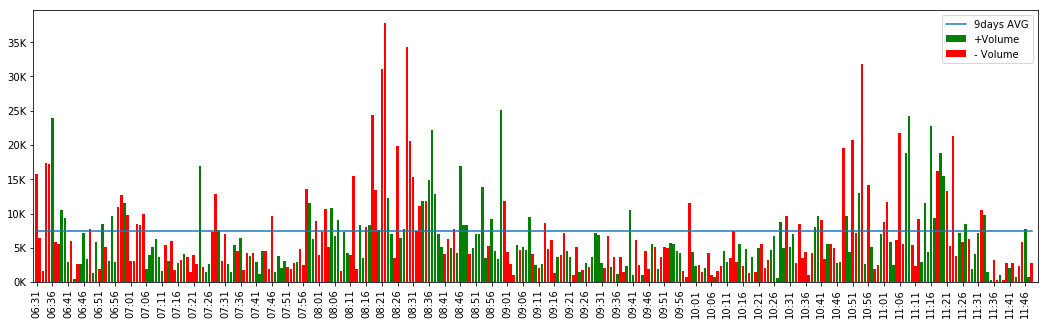

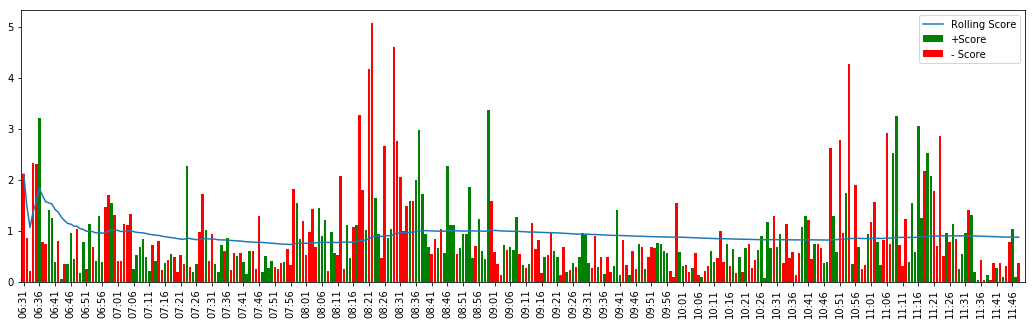

6. PCRX 11:48AM: Rolling Score 0.722256618616182, Current Score 0.1549241996173704


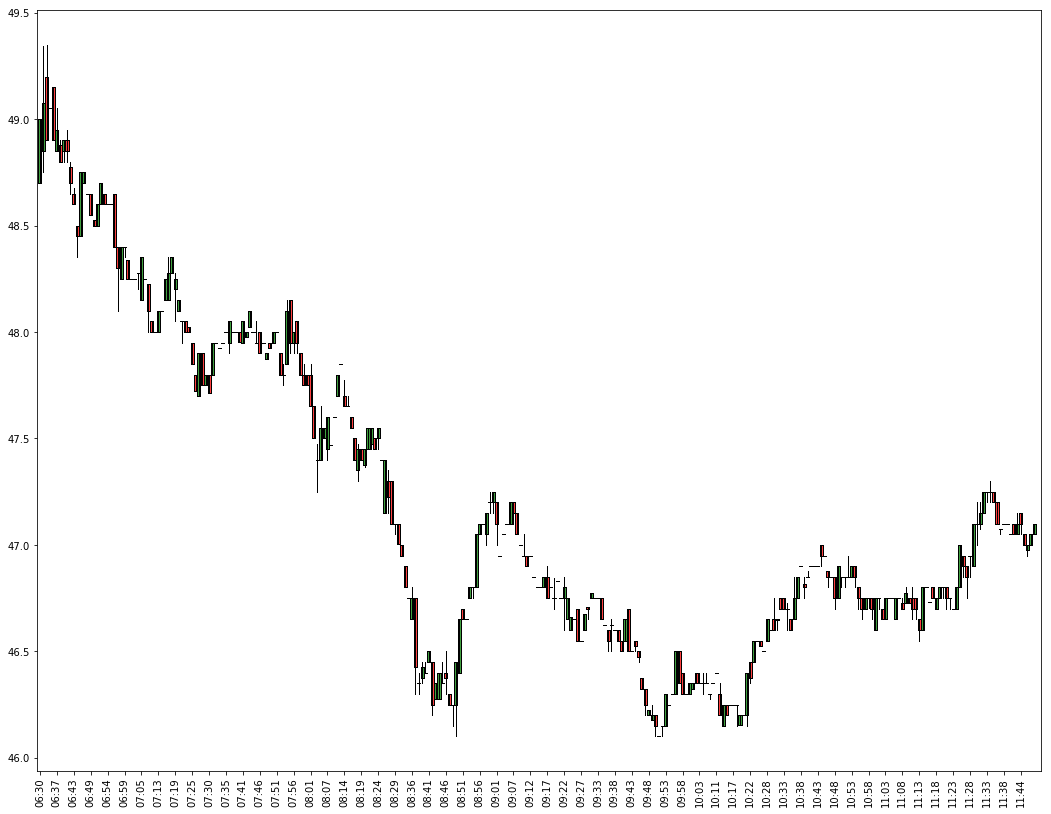

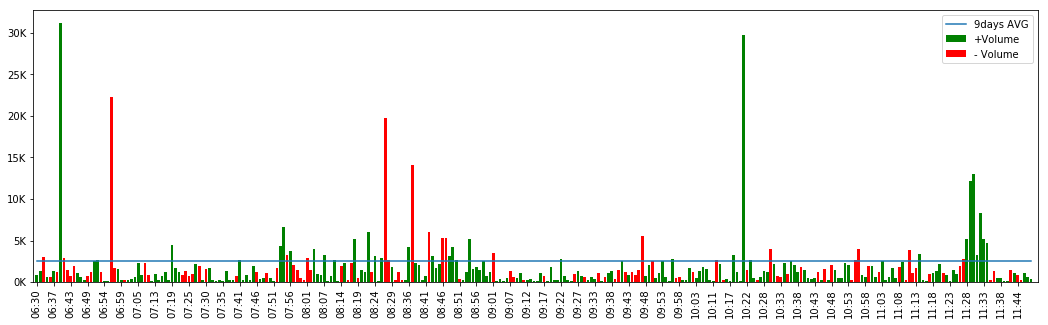

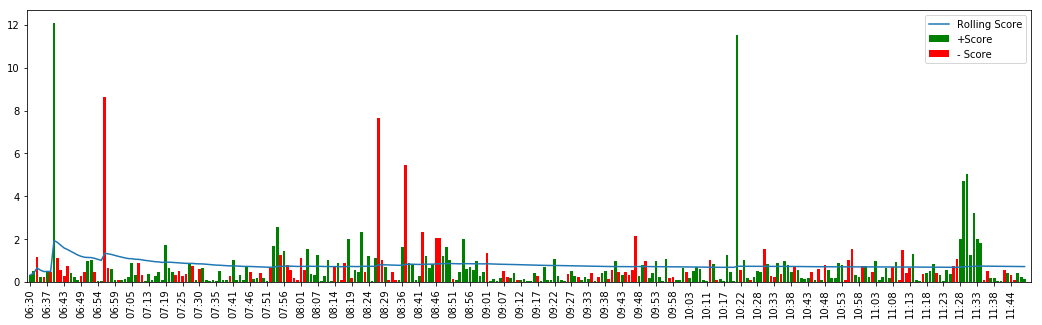

7. WTW 11:48AM: Rolling Score 0.7000884406725378, Current Score 0.14028051673903008


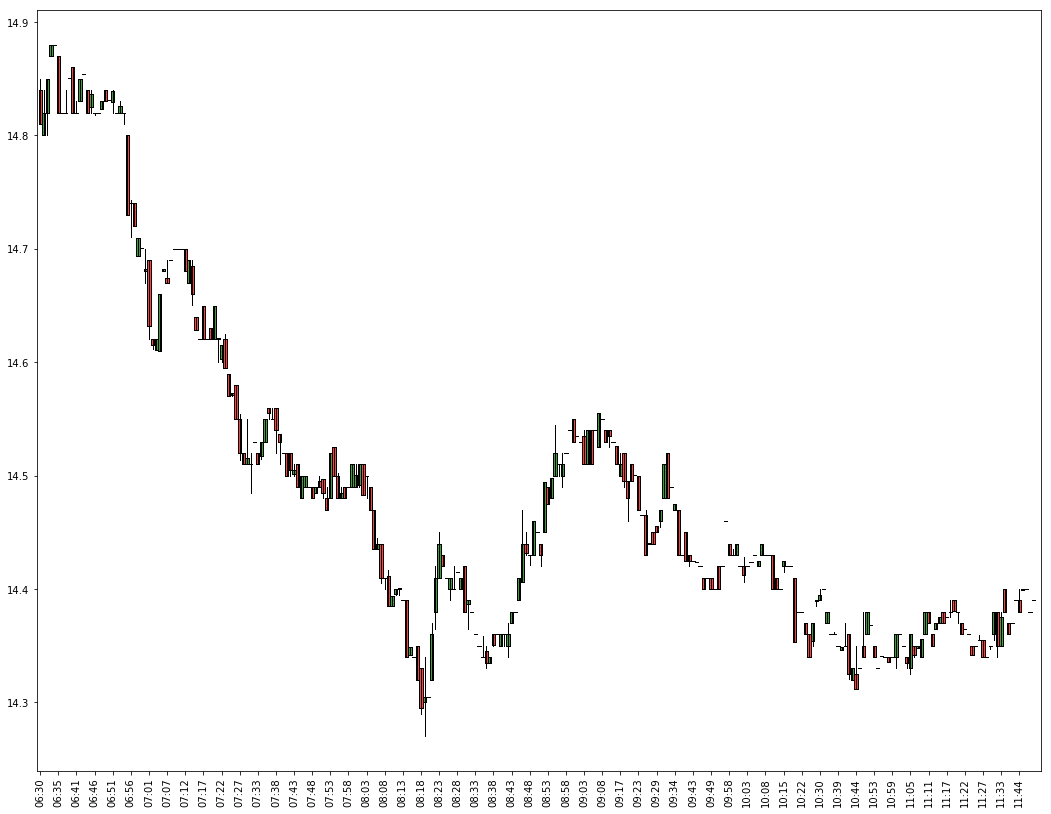

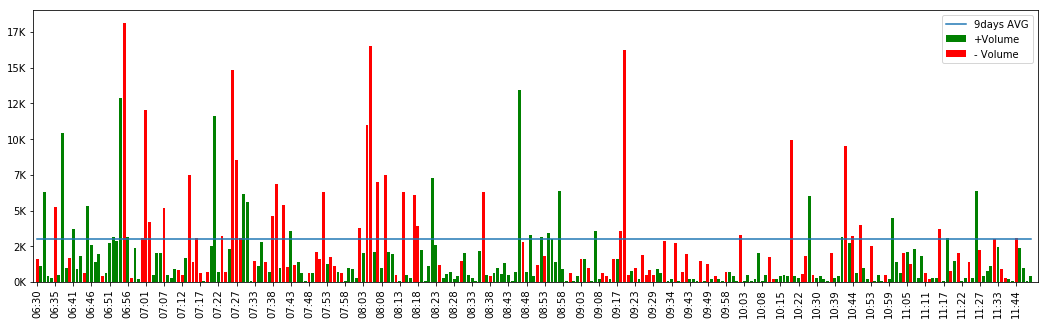

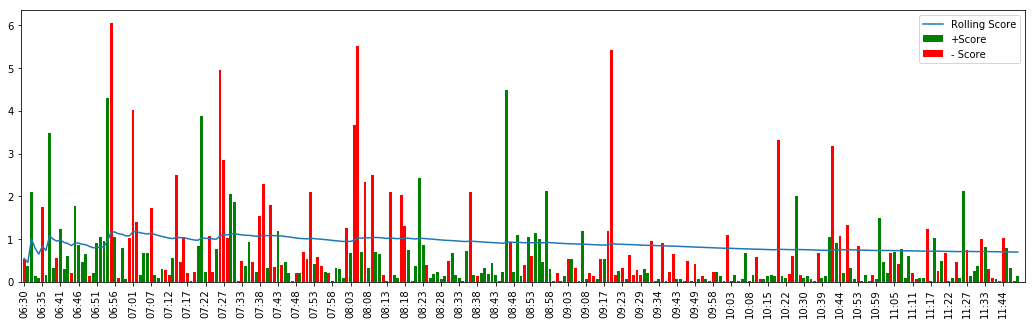

last update 2017-03-21 11:48:55.776387-07:00
prev update None
update time 0:00:50.801932


KeyboardInterrupt: 

In [19]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
DATA_TIMEZONE = pytz.timezone("US/Eastern")
LOCAL_TZ = pytz.timezone('America/Los_Angeles')
stocks = get_stocks()


def display_list_items(top_df, all_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol])

last_time = None

while True:    
    now = datetime.now(tz=LOCAL_TZ)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
            
        df = get_data_parallel(stocks)
        
        if df is not None:
            clear_output()
            last_minute_data = df.groupby('symbol').last().reset_index()
            
            display(HTML("<h3>Rolling Score List</h3>"))           
            top_volimes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)
            
            display(HTML("<h3>Current Score List</h3>"))
            top_volimes = last_minute_data.sort_values(by='current_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)                
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=LOCAL_TZ) - now)
        last_time = now        
    else:       
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)